## **Importing Required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## **Importing datasets from sklearn datasets**

In [4]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [5]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [16]:
#Loading dataset to Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)


In [17]:
#print first five datas of our dataframe
house_price_dataframe.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [20]:
#add target (medhouseVal) in dataframee
house_price_dataframe['MedHouseVal']=house_price_dataset.target

In [21]:
house_price_dataframe.head() #gives_top_5_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
house_price_dataframe.shape

(20640, 9)

## **# Handling Missing value**

In [24]:
house_price_dataframe.isnull().sum()  #No Missing Present

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [25]:
#stastical measures of dataframe
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## **Understanding correlation between features in dataset**

In [27]:
#positive_correlation
correlation = house_price_dataframe.corr()

<Axes: >

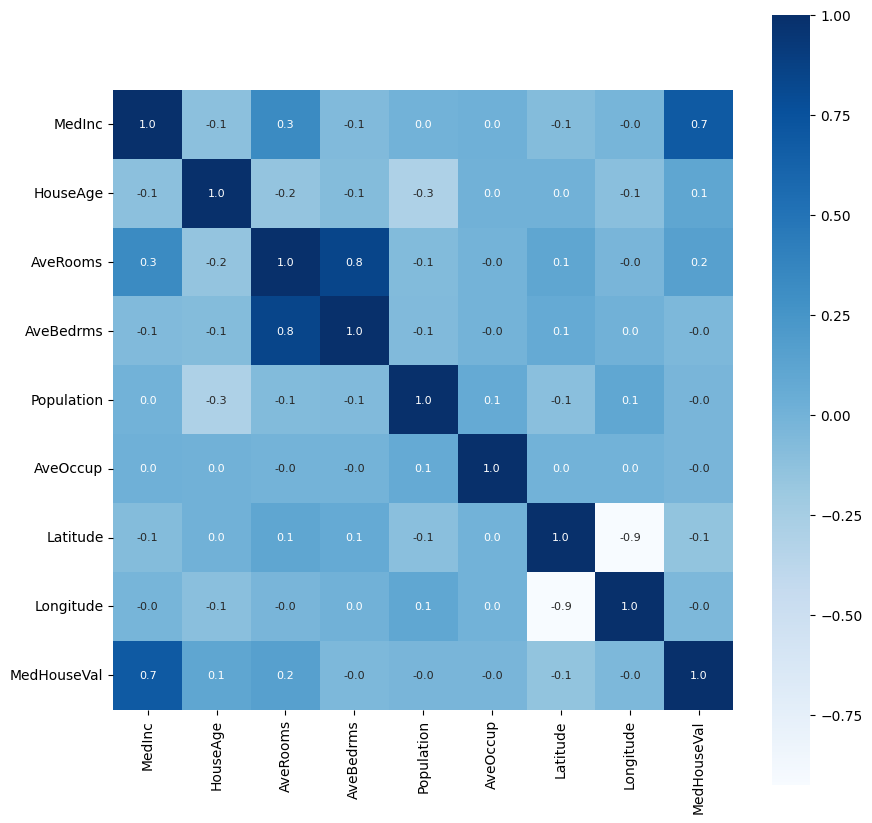

In [32]:
#constructing heatmap to visualize correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws= {'size': 8}, cmap = 'Blues')


## **Splitting data and target**

In [34]:
X = house_price_dataframe.drop(['MedHouseVal'], axis=1)   #axis=0 for dropping row and 1 for column
y= house_price_dataframe['MedHouseVal']

In [35]:
X.shape

(20640, 8)

In [36]:
y.shape

(20640,)

# **Splitting data into training and test data**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# **Model Trainig using XGBRegressor**

In [54]:
#loading Model
model = XGBRegressor()
#training Model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
#evaluating our model
#prdiction on training data
training_predict = model.predict(X_train)
print(training_predict)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [56]:
#r squred error
score_1 = metrics.r2_score(y_train, training_predict)
score_2 = metrics.mean_absolute_error(y_train, training_predict)

In [57]:
print('R square error:', score_1)
print('Mean absolute error:', score_2)

R square error: 0.9451221492760822
Mean absolute error: 0.1919170860794262


In [58]:
test_predict = model.predict(X_test)
print(test_predict)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [60]:
score_3 = metrics.r2_score(y_test, test_predict)
score_4 = metrics.mean_absolute_error(y_test, test_predict)
print('R square error:', score_3)
print('Mean absolute error:', score_4)


R square error: 0.8412904408180302
Mean absolute error: 0.30753655785801337


Visualizing the actual Prices and Predicted Prices

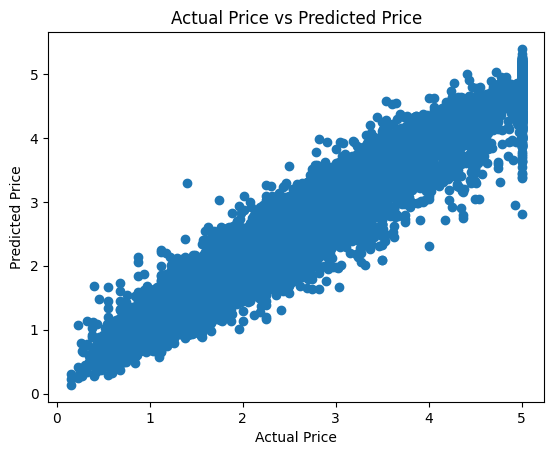

In [61]:
plt.scatter(y_train, training_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()